In [1]:
import pandas as pd
import pyarrow
import seaborn as sns
print("OK paquetes")

OK paquetes


In [5]:
import os

os.listdir("../datos_examen")

['application_.parquet',
 'bureau.parquet',
 'bureau_balance.parquet',
 'credit_card_balance.parquet',
 'HomeCredit_columns_description.parquet',
 'installments_payments.parquet',
 'POS_CASH_balance.parquet',
 'previous_application.parquet']

In [7]:
import pandas as pd

app = pd.read_parquet("../datos_examen/application_.parquet")
app.shape

(307511, 122)

## Paso 1 - Ver la variable objetivo (TARGET)

In [8]:
app["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [9]:
app["TARGET"].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

## Paso 2 - Gráfico del desbalance

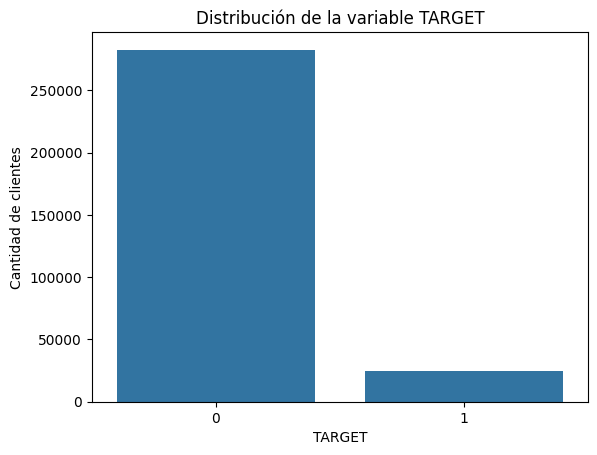

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="TARGET", data=app)
plt.title("Distribución de la variable TARGET")
plt.ylabel("Cantidad de clientes")
plt.show()

## Paso 3 - Variables numéricas clave (rápido)

In [11]:
app[["AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_BIRTH"]].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH
count,3.075110e+05,3.075110e+05,307511.000000
mean,1.687979e+05,5.990260e+05,-16036.995067
std,2.371231e+05,4.024908e+05,4363.988632
min,2.565000e+04,4.500000e+04,-25229.000000
25%,1.125000e+05,2.700000e+05,-19682.000000
50%,1.471500e+05,5.135310e+05,-15750.000000
75%,2.025000e+05,8.086500e+05,-12413.000000
max,1.170000e+08,4.050000e+06,-7489.000000


## Edad en años:

In [12]:
(app["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## Paso 4 - Valores nulos (top 15)

In [13]:
(app.isna().mean().sort_values(ascending=False).head(15) * 100)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
dtype: float64

## Análisis Exploratorio Inicial

- El dataset principal contiene **307.511 registros** y **122 variables**.
- La variable objetivo (`TARGET`) presenta un fuerte desbalance, con una minoría de clientes que incumplen el pago.
- Se observan variables con un alto porcentaje de valores nulos, lo que requerirá estrategias de imputación o eliminación durante la preparación de datos.

El fuerte desbalance de clases sugiere la necesidad de técnicas como class weighting, resampling o métricas distintas a accuracy.